In [17]:
# Importing LIbraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

from PIL import Image
import cv2
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 1# RGB color
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

In [12]:
# Modules to ignore warnings
import warnings               
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os   
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [2]:
#Lets take a look at our directory
import os,shutil
print(os.listdir("../Python Lab/10_categories"))

['airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces', 'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch']


In [ ]:
import shutil
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# create sub-folders for each class
OUTPATH = 'data/cifar10/'
for x in classes:
    os.makedirs(OUTPATH+'train/'+x, exist_ok=True)
    os.makedirs(OUTPATH+'val/'+x, exist_ok=True)

INPATH = "../Python Lab/10_categories"
filenames = os.listdir(INPATH+'train/')
counts = {x:0 for x in classes}
print(len(filenames))

# copy files from cifar folder to cifar10 folder with sub-directories
valsz = len(filenames) / 10 * 0.2 # 20%

for fl in filenames:
    for cl in classes:
        if cl in fl:
            counts[cl] += 1 # increase count +1
            if counts[cl] < valsz:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'val/'+cl+'/'+fl)
            else:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'train/'+cl+'/'+fl)
        if 'automobile' in fl:
            counts['car'] += 1
            if counts[x] < valsz:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'val/car/'+fl)
            else:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'train/car/'+fl)

# copy test set
filenames = os.listdir(INPATH+'test/')
os.makedirs(OUTPATH+'test/', exist_ok=True)

for fl in filenames:
    shutil.copy(INPATH+'test/'+fl, OUTPATH+'test/'+fl)

In [ ]:
import shutil
classes = ('airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces', 'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch')

# create sub-folders for each class
OUTPATH = "../Python Lab/10_class_ic_input/'
os.makedirs(OUTPATH+'train', exist_ok=True)
os.makedirs(OUTPATH+'test1', exist_ok=True)

INPATH = "../Python Lab/10_categories"
filenames = os.listdir(INPATH)
counts = {x:0 for x in classes}
print(len(filenames))

# copy files from cifar folder to cifar10 folder with sub-directories
valsz = len(filenames) / 10 * 0.2 # 20%

for fl in filenames:
    for cl in classes:
        if cl in fl:
            counts[cl] += 1 # increase count +1
            if counts[cl] < valsz:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'val/'+cl+'/'+fl)
            else:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'train/'+cl+'/'+fl)
        if 'automobile' in fl:
            counts['car'] += 1
            if counts[x] < valsz:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'val/car/'+fl)
            else:
                shutil.copy(INPATH+'train/'+fl, OUTPATH+'train/car/'+fl)

# copy test set
filenames = os.listdir(INPATH+'test/')
os.makedirs(OUTPATH+'test1/', exist_ok=True)

for fl in filenames:
    shutil.copy(INPATH+'test/'+fl, OUTPATH+'test/'+fl)

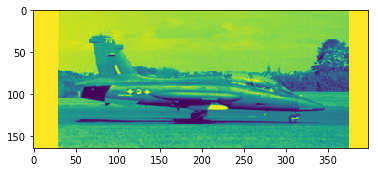

In [3]:
import cv2
import numpy
import glob
import pylab as plt
path = 'E:/Insofe/Python Lab/10_cat_output/'
folders = glob.glob('E:\\Insofe\\Python Lab\\10_categories\\*')
categories = []
count = 0
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
            imagenames_list.append(f)
            
            
read_images = []        
X = []

for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))
    image_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(image_array, (IMAGE_SIZE))
    new_array= new_array.reshape(128,128,1)
    X.append(new_array)
    im = image.split('\\')[5]
    category = image.split('\\')[4]
    #write_name = category + '_' + im
    #cv2.imwrite(path + write_name, img)
    if category == 'airplanes':
        categories.append('C0')
    elif category == 'BACKGROUND_Google':
        categories.append('C1')
    elif category == 'bonsai':
        categories.append('C2')
    elif category == 'car_side':
        categories.append('C3')
    elif category == 'Faces':
        categories.append('C4')
    elif category == 'Faces_easy':
        categories.append('C5')
    elif category == 'grand_piano':
        categories.append('C6')
    elif category == 'Leopards':
        categories.append('C7')
    elif category == 'Motorbikes':
        categories.append('C8')
    elif category == 'watch':
        categories. append('C9')
    else:
        pass

    

plt.imshow(read_images[0])

  


In [5]:
print(len(categories))
print(len(imagenames_list))
df = pd.DataFrame({
    'filename':imagenames_list,
    'category':categories
})
from sklearn.utils import shuffle
df = shuffle(df)

3724
3724


In [7]:
train_path = 'E:/Insofe/Python Lab/10_categories/'   # Train data path
val_path = 'E:/Insofe/Python Lab/10_cat_output/'       # Validation data path
classes = os.listdir(train_path)                                   # List of directories in train path
print(classes)

['airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces', 'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch']


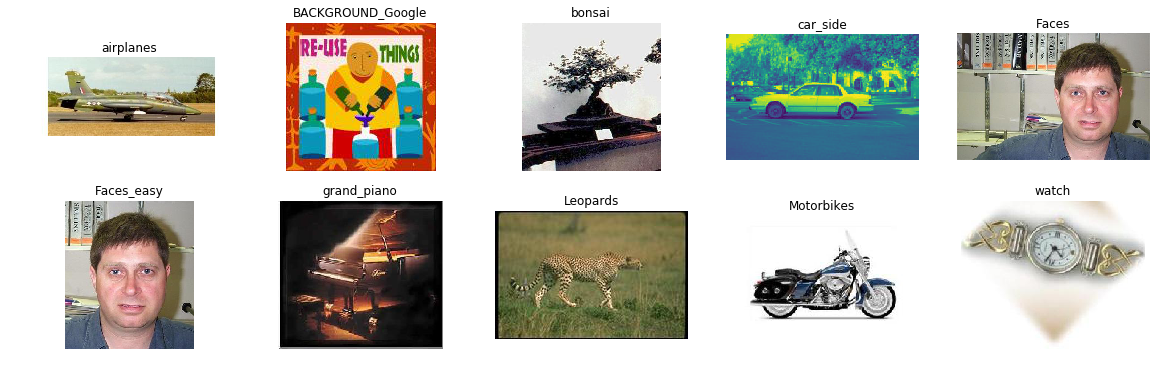

In [13]:
# Plot a sample image from each category

plt.figure(figsize=(20,6))
for ix,i in enumerate(classes):
    f = os.listdir(os.path.join(train_path,i))[0]
    img = mpimg.imread(os.path.join(train_path,i,f))
    plt.subplot(2,5,ix+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)

In [18]:
# Import ImageDataGenerator for image preprocessing/augmentation
# This basically creates multiple copies of train images by jittering(adding noise). 
# This includes rotating, zooming in, flipping, shifting, etc.

datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') # 'nearest' is kind of algorithm to fill pixel values while transformation

In [19]:
aug_images_path = 'imageview'
f = os.listdir(os.path.join(train_path,classes[7]))[0]
print(f)
img_path = os.path.join(train_path,classes[7],f)

img = load_img(img_path)       # this is a PIL image
x = img_to_array(img)          # this is a Numpy array with shape (480, 640, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 480, 640, 3)

# Create a directory named 'imageview' to save augmented images. 
# Delete, if already exists
if os.path.isdir(aug_images_path):
#     os.system('rm -rf '+aug_images_path)
    shutil.rmtree(aug_images_path)
    
os.system('mkdir '+aug_images_path)
    
# the .flow() command below generates augmented images and saves them to a directory names 'preview'
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=aug_images_path, save_prefix='c0', save_format='jpg'):
    i += 1
    if i > 9:
        break  # otherwise the generator would loop indefinitely

image_0001.jpg


In [20]:
df.head()
print(df.shape)

(3724, 2)


In [21]:
df.tail()

,filename,category
2247,E:\Insofe\Python Lab\10_categories\Faces_easy\...,C5
2448,E:\Insofe\Python Lab\10_categories\grand_piano...,C6
3702,E:\Insofe\Python Lab\10_categories\watch\image...,C9
2518,E:\Insofe\Python Lab\10_categories\Leopards\im...,C7
2793,E:\Insofe\Python Lab\10_categories\Motorbikes\...,C8


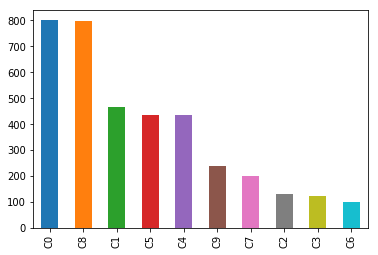

In [22]:
df['category'].value_counts().plot.bar()

In [23]:
df.head(5)

,filename,category
2312,E:\Insofe\Python Lab\10_categories\Faces_easy\...,C5
334,E:\Insofe\Python Lab\10_categories\airplanes\i...,C0
482,E:\Insofe\Python Lab\10_categories\airplanes\i...,C0
3520,E:\Insofe\Python Lab\10_categories\watch\image...,C9
2296,E:\Insofe\Python Lab\10_categories\Faces_easy\...,C5


In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
    
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

In [25]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os
print(os.listdir("../Python Lab/10_categories"))

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

['airplanes', 'BACKGROUND_Google', 'bonsai', 'car_side', 'Faces', 'Faces_easy', 'grand_piano', 'Leopards', 'Motorbikes', 'watch']


In [26]:
# Build model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [27]:
# Callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [28]:
#Early Stop
#To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
# Import EarlyStopping - method to stop training when a monitored quantity has stopped improving.
#Define a callback.Set monitor as val_acc, patience as 5 and mode as max so that 
#if val_acc does not improve over 5 epochs, terminate the training process.
earlystop = EarlyStopping(patience=10)

In [29]:
# Learning Rate Reduction
# We will reduce the learning rate when then accuracy not increase for 2 steps
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [30]:
callbacks = [earlystop, learning_rate_reduction]

In [31]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(df, test_size = 0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

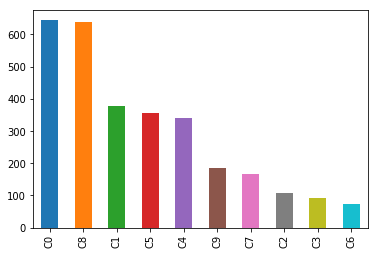

In [32]:
train_df['category'].value_counts().plot.bar()

In [33]:
print(train_df.shape,validate_df.shape)

(2979, 2) (745, 2)


In [34]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 2 columns):
filename    2979 non-null object
category    2979 non-null object
dtypes: object(2)
memory usage: 46.6+ KB


In [36]:
#shear_range: Shear Intensity
#zoom_range: Range for random zoom.
#horizontal_flip: Randomly flip inputs horizontally if true.
#Define the training and test datasets using the flow_from_directory which takes the path to a directory, 
#and generates batches of augmented/normalized data.
#directory: path to the target directory. It should contain one subdirectory per class.
#target_size: The dimensions to which all images found will be resized.
#class_mode: one of "categorical", "binary", "sparse", "input" or None. Determines the type of label arrays that are returned
#batch_size: size of the batches of data

# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "../Python Lab/10_categories",
    x_col = 'filename',
    y_col = 'category',
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

Found 2979 images belonging to 10 classes.


In [37]:
# Validation generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "../Python Lab/10_categories",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 745 images belonging to 10 classes.


In [38]:
#Fit the Model
#Invoke the fit_generator to fits the model on data generated batch-by-batch by a Python generator.
#steps_per_epoch’ holds the number of training images, i.e 8000
#A single epoch is a single step in training a neural network,set it at 25.
#callbacks: List of callbacks to apply during training.
#validation_data: test data
#validation_steps: Total number of steps (batches of samples) to yield from validation_data generator before stopping 
#at the end of every epoch. It should typically be equal to the number of samples of your validation dataset divided by the
#batch size.

epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
    
)

Epoch 1/50
198/198 [==============================] - 803s 4s/step - loss: 1.3830 - acc: 0.6222 - val_loss: 1.2508 - val_acc: 0.7306
Epoch 2/50
198/198 [==============================] - 575s 3s/step - loss: 0.7760 - acc: 0.7723 - val_loss: 1.2553 - val_acc: 0.6534
Epoch 3/50
198/198 [==============================] - 607s 3s/step - loss: 0.6203 - acc: 0.8109 - val_loss: 0.8317 - val_acc: 0.7973
Epoch 4/50
198/198 [==============================] - 520s 3s/step - loss: 0.5154 - acc: 0.8388 - val_loss: 3.3243 - val_acc: 0.4137
Epoch 5/50
198/198 [==============================] - 513s 3s/step - loss: 0.5302 - acc: 0.8383 - val_loss: 0.4491 - val_acc: 0.8507
Epoch 6/50
198/198 [==============================] - 517s 3s/step - loss: 0.4343 - acc: 0.8623 - val_loss: 0.3702 - val_acc: 0.9068
Epoch 7/50
198/198 [==============================] - 512s 3s/step - loss: 0.4017 - acc: 0.8760 - val_loss: 0.6479 - val_acc: 0.8000
Epoch 8/50
198/198 [==============================] - 505s 3s/step - 

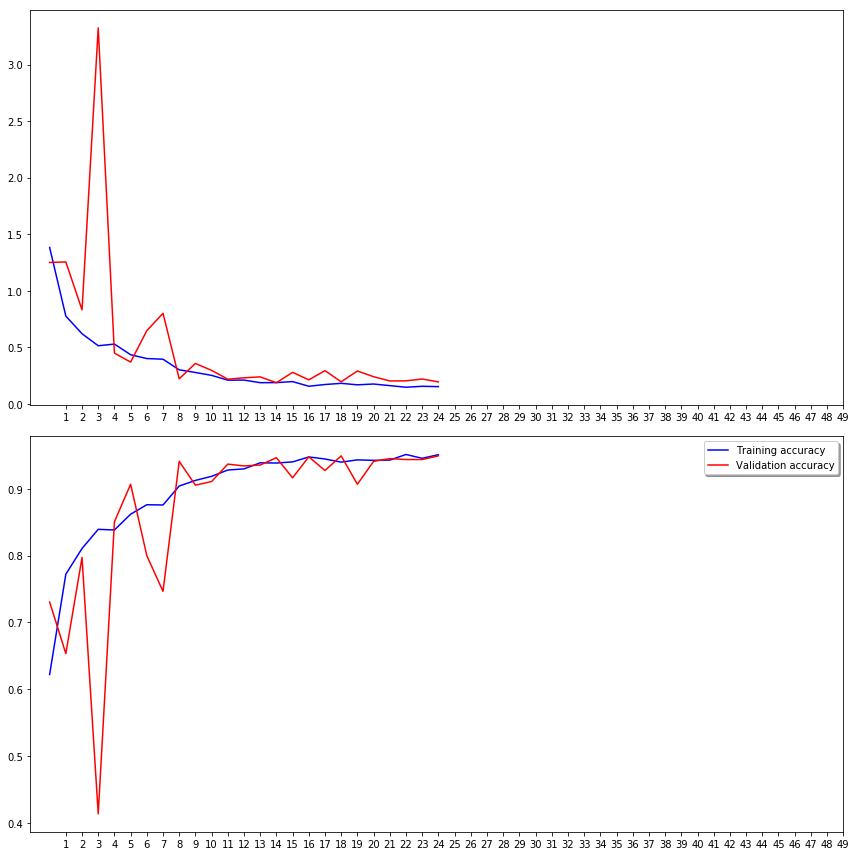

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [41]:
# Save Model
model.save_weights("model_10class_regularcnn.h5")

In [73]:
# Prepare Testing Data
test_filenames = os.listdir("../Python Lab/10_class_ic_output/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]


In [74]:
# Create Testing Generator
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../Python Lab/10_class_ic_output/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 1 images.


In [85]:
# Predict
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [86]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})


In [87]:
predict

array([[0.995276, 0.000473, 0.000147, 0.000013, 0.000020, 0.000016,
        0.000071, 0.000002, 0.000040, 0.003942]], dtype=float32)

In [98]:
y_pred = pd.DataFrame(predict, columns=['C0', 'C1','C2','C3','C4','C5','C6','C7','C8','C9'])

In [96]:
y_pred.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.995276,0.000473,0.000147,0.000013,0.00002,0.000016,0.000071,0.000002,0.00004,0.003942


In [104]:
y_pred['Max'] = y_pred.idxmax(axis=1)


In [105]:
 y_pred.head(1)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,Max
0,0.995276,0.000473,0.000147,0.000013,0.00002,0.000016,0.000071,0.000002,0.00004,0.003942,C0
